In [1]:
import numpy as np
import gymnasium
import neurolib.control.reinforcement_learning
import matplotlib.pyplot as plt

In [2]:
env = gymnasium.make('PhaseShifting-v0', control_strength_loss_scale=0.005)

# Random Agent

In [3]:
observation, info = env.reset()

observations = []
rewards = []
actions = []

while True:
    action = env.action_space.sample()  # agent policy that uses the observation and info
    observation, reward, terminated, truncated, info = env.step(action)
    observations.append(observation)
    rewards.append(reward)
    actions.append(action)
    
    if terminated or truncated:
        observation, info = env.reset()
        break

excs = np.array([obs["exc"].item() for obs in observations])
inhs = np.array([obs["inh"].item() for obs in observations])
actions = np.array(actions)[:, :, 0]
rewards = np.array(rewards)

In [4]:
rewards.sum()

-655.8638617410197

Text(0.5, 0, 'timestep')

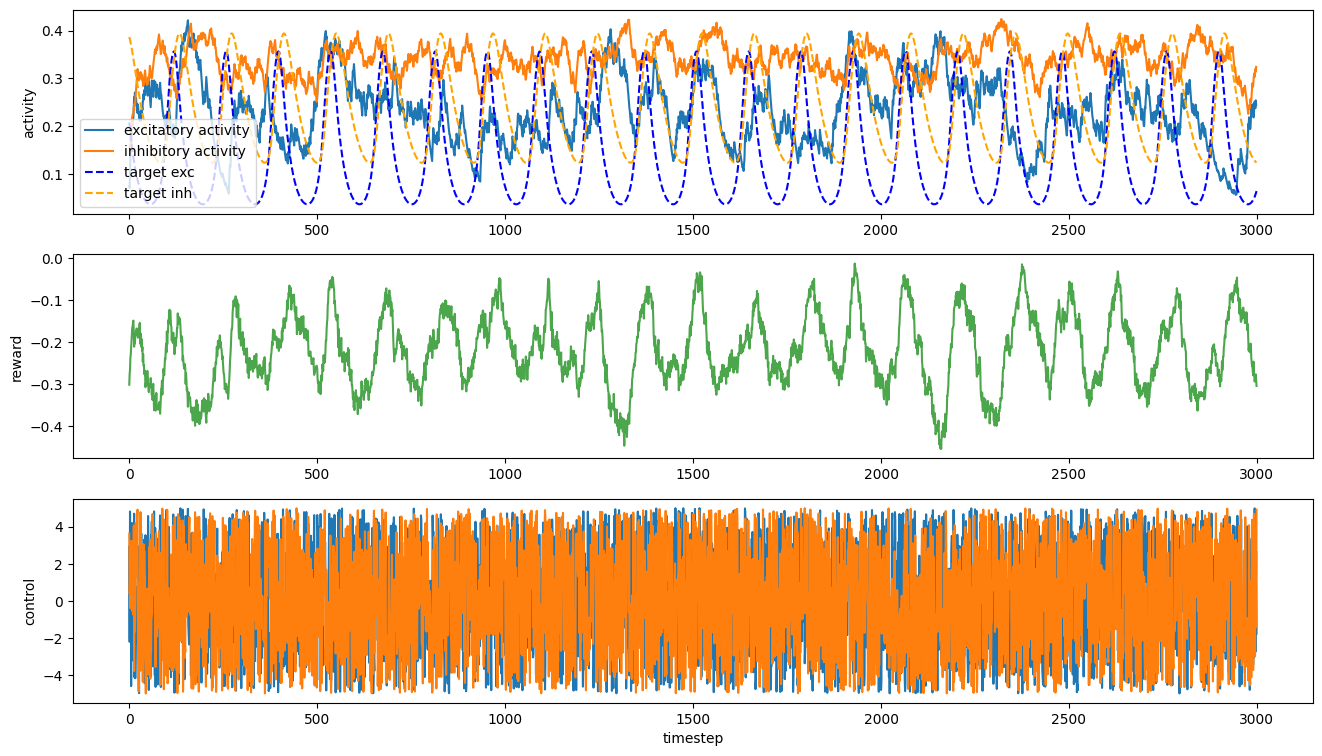

In [5]:
plt.figure(figsize=(16, 9))
plt.subplot(311)
plt.plot(excs, label='excitatory activity')
plt.plot(inhs, label='inhibitory activity')
plt.plot(env.unwrapped.target[0], linestyle='--', c='blue', label='target exc')
plt.plot(env.unwrapped.target[1], linestyle='--', c='orange', label='target inh')
plt.ylabel('activity')
plt.legend()
plt.legend()
plt.subplot(312)
plt.plot(rewards, c='g', alpha=0.7, label='reward')
plt.ylabel('reward')
plt.subplot(313)
plt.plot(actions)
plt.ylabel('control')
plt.xlabel('timestep')

# Simple Baseline Agent

In [6]:
observation, info = env.reset()

observations = []
rewards = []
actions = []

while True:
    if env.unwrapped.t_i < 90:
        action = (np.array([3.0]), np.array([-3]))
    else:
        action = (np.array([0]), np.array([0]))
    observation, reward, terminated, truncated, info = env.step(action)
    observations.append(observation)
    rewards.append(reward)
    actions.append(action)
    
    if terminated or truncated:
        observation, info = env.reset()
        break

excs = np.array([obs["exc"].item() for obs in observations])
inhs = np.array([obs["inh"].item() for obs in observations])
actions = np.array(actions)[:, :, 0]
rewards = np.array(rewards)

In [7]:
rewards.sum()

-63.96490361082421

Text(0.5, 0, 'timestep')

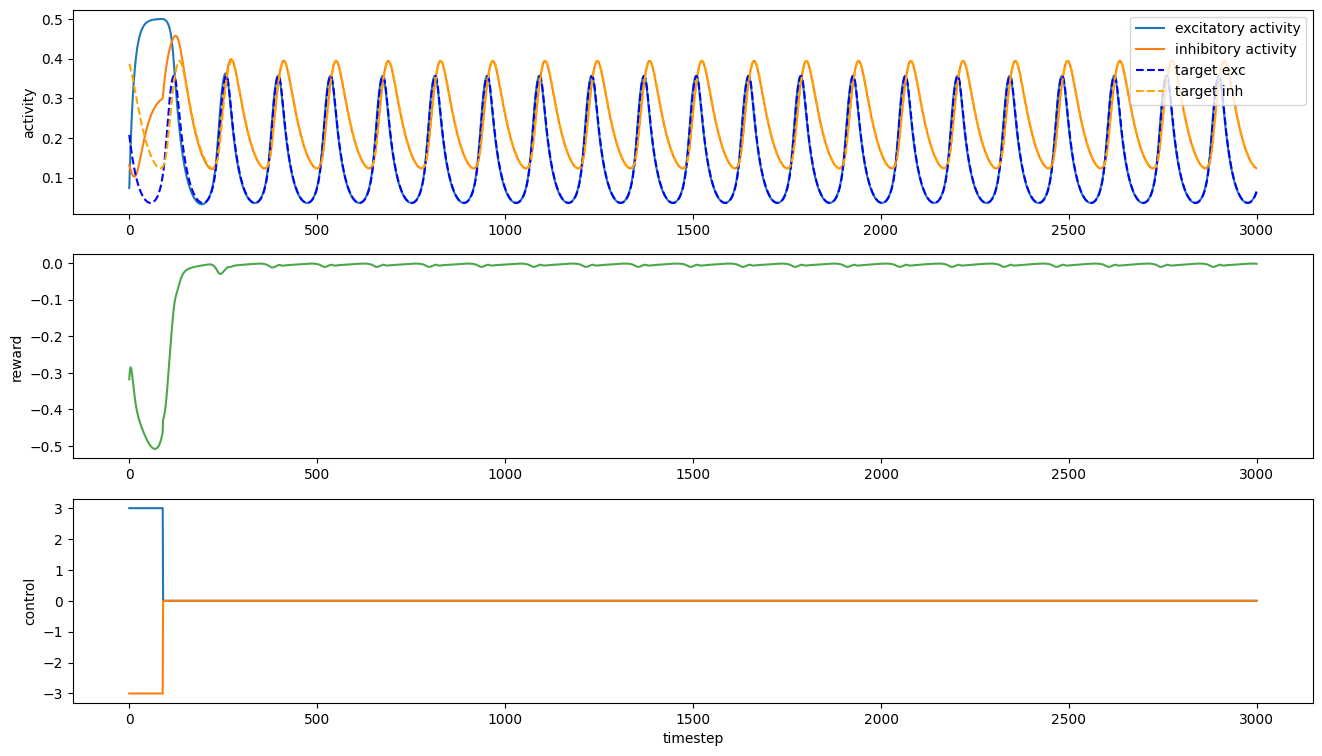

In [8]:
plt.figure(figsize=(16, 9))
plt.subplot(311)
plt.plot(excs, label='excitatory activity')
plt.plot(inhs, label='inhibitory activity')
plt.plot(env.unwrapped.target[0], linestyle='--', c='blue', label='target exc')
plt.plot(env.unwrapped.target[1], linestyle='--', c='orange', label='target inh')
plt.ylabel('activity')
plt.legend()
plt.legend()
plt.subplot(312)
plt.plot(rewards, c='g', alpha=0.7, label='reward')
plt.ylabel('reward')
plt.subplot(313)
plt.plot(actions)
plt.ylabel('control')
plt.xlabel('timestep')